<a href="https://colab.research.google.com/github/kkarp9/CYSE635-Group7-DataBusters/blob/main/src/Data_Busters_CYSE635_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Busters - Not Demure, Not Mindful (Group 9): Data Poisoning Attack
## Macky Castro and Kurt Karpin
## CYSE 635

# Part 1: Email Dataset Setup

**Import All Applicable Libraries for Project**

In [ ]:
import pandas as pd # pandas is used to deal with datasets, dataframes
import numpy as np # deal to numbers and large arrays
import matplotlib.pyplot as plt # to draw any plot
import seaborn as sns # to draw any plot
import warnings
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


**Check if running on Google Collab or Locally such as VScode**

In [ ]:
from google.colab import files
environment = 0
while environment != '1' or environment != '2':
  environment = input('Press 1 if this is running on Google Collab or 2 if running locally.')
  if environment == '1' or environment == '2':
    break
  else:
    print('Invalid Input. Please try again.')
if environment == '1':
  uploaded = files.upload()

Press 1 if this is running on Google Collab or 2 if running locally.1


Saving Phishing_Email.csv to Phishing_Email.csv


**Check the current working directory using os.getcwd() and check all the files in the /content/ directory**


In [ ]:
import os

curr_dir = os.getcwd()
print(curr_dir)



/content


In [ ]:
ls -al /content/

total 50832
drwxr-xr-x 1 root root     4096 Dec  3 05:20 ./
drwxr-xr-x 1 root root     4096 Dec  3 05:09 ../
drwxr-xr-x 4 root root     4096 Nov 25 19:13 .config/
-rw-r--r-- 1 root root 52034604 Dec  3 05:20 Phishing_Email.csv
drwxr-xr-x 1 root root     4096 Nov 25 19:13 sample_data/


**Read the Phishing CSV files from the `/content/` directory**

In [ ]:
if environment == '1':
  df = pd.read_csv('/content/Phishing_Email.csv')
else:
  # assumes csv file is in the same directory locally as this notebook file
  df = pd.read_csv('Phishing_Email.csv')

print(f'Email shape: {df.shape}')
print(f'Top 5 rows of emails:\n {df.head(5)}')
df.columns

Email shape: (18650, 3)
Top 5 rows of emails:
    Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  


Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

**Clean up DataFrame**

In [ ]:
df = df.drop(labels = ['Unnamed: 0'], axis = 1)
print(f'Updated Email shape: {df.shape}')
print(f'Updated Top 5 rows of emails:\n {df.head(5)}')

og_size = len(df)
# drop empty and duplicated email entries
df = df.dropna()
df = df.drop_duplicates()
print(f'Post Clean Email shape: {df.shape}')

curr_size = len(df)
print(f'Size Difference: {og_size - curr_size}')
print(f'Rate of Data Loss: {(og_size - curr_size) / og_size}')


Updated Email shape: (18650, 2)
Updated Top 5 rows of emails:
                                           Email Text      Email Type
0  re : 6 . 1100 , disc : uniformitarianism , re ...      Safe Email
1  the other side of * galicismos * * galicismo *...      Safe Email
2  re : equistar deal tickets are you still avail...      Safe Email
3  \nHello I am your hot lil horny toy.\n    I am...  Phishing Email
4  software at incredibly low prices ( 86 % lower...  Phishing Email
Post Clean Email shape: (17538, 2)
Size Difference: 1112
Rate of Data Loss: 0.05962466487935657


**Confirm the Labels Under Set**


This shows that there are only 2 unique labels meaning this is a binary classification.

In [ ]:
email_types = df['Email Type'].unique()

print(f"Unique Email Labels:\n{email_types}")

Unique Email Labels:
['Safe Email' 'Phishing Email']


**Data Visualization**

Pie Chart to see how many Phishing and Safe emails are there.

Pie Chart of Safe and Phishing Emails


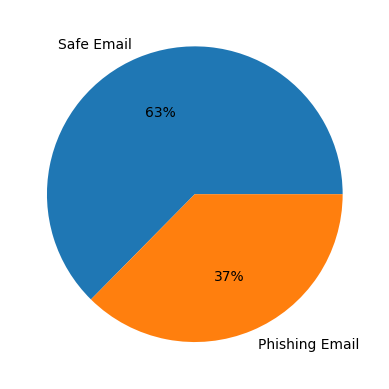

In [ ]:
print('Pie Chart of Safe and Phishing Emails')
ratio = df['Email Type'].value_counts()
plt.pie(ratio, labels = ratio.index, autopct = '%1.0f%%')

plt.show()

**Bar Chart Visualization**

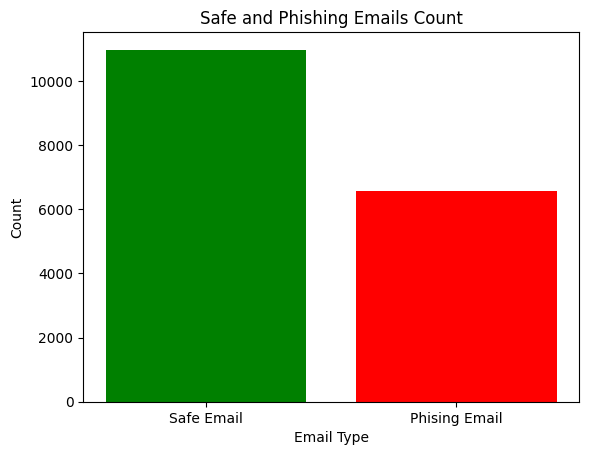

In [43]:
plt.bar(['Safe Email', 'Phising Email'], [(df['Email Type'] == 'Safe Email').sum(), (df['Email Type'] == 'Phishing Email').sum()], color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Safe and Phishing Emails Count')
plt.show()

**Label Encoding**

# Part 2: Initial Machine Learning Model

In [ ]:
# split Email Type column to model

X = df['Email Text'].values
Y = df['Email Type'].values
print(X.shape)
print(Y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 101)
print("\n X_train Shape: ", X_train.shape)

print("\n X_test Shape: ", X_test.shape)

print("\n y_train  Shape: ", y_train.shape)
print("\n y_test Shape: ", y_test.shape)

(17538,)
(17538,)

 X_train Shape:  (14030,)

 X_test Shape:  (3508,)

 y_train  Shape:  (14030,)

 y_test Shape:  (3508,)


In [ ]:
# Importing Libraries for the model ,Tfidf and Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])

In [ ]:
# Trian Our model
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
#accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.67%


In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1208  110]
 [  77 2113]]


In [ ]:
#classification_report
cr = classification_report(y_test,y_pred)
print(cr)

                precision    recall  f1-score   support

Phishing Email       0.94      0.92      0.93      1318
    Safe Email       0.95      0.96      0.96      2190

      accuracy                           0.95      3508
     macro avg       0.95      0.94      0.94      3508
  weighted avg       0.95      0.95      0.95      3508



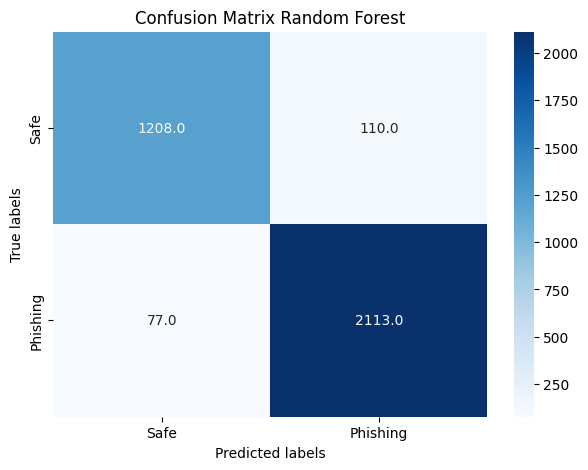

In [ ]:
labels = ['Safe', 'Phishing']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm,cmap="Blues",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Random Forest');

**Training Support Vector Machine**

In [28]:
classifier_svm = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",SVC(kernel='rbf', random_state=0))])
classifier_svm.fit(X_train,y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(random_state=0))])

**SVM Model Evaluation**

Accuracy: 98.49%
[[1290   28]
 [  25 2165]]
Classification Report:
                 precision    recall  f1-score   support

Phishing Email       0.98      0.98      0.98      1318
    Safe Email       0.99      0.99      0.99      2190

      accuracy                           0.98      3508
     macro avg       0.98      0.98      0.98      3508
  weighted avg       0.98      0.98      0.98      3508



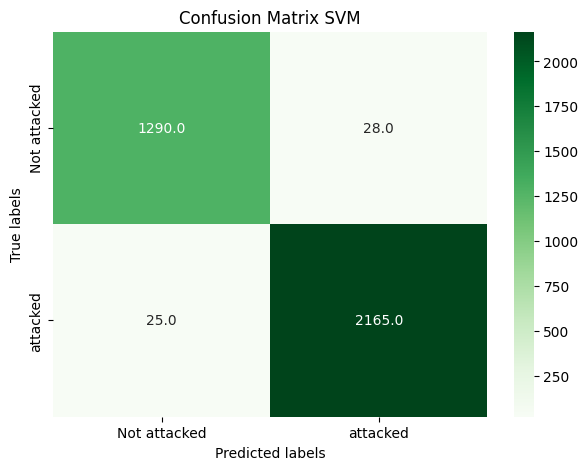

In [30]:
y_pred_svm = classifier_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print("Accuracy: %.2f%%" % (svm_accuracy * 100.0))

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

cf_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", cf_report_svm)

labels = ['Not attacked', 'attacked']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_svm,cmap="Greens",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix SVM');

plt.show()

**Accuracy Comparison Between Random Forest and Support Vector Machine**

RF Accuracy: 0.9466932725199544
SVM Accuracy: 0.9848916761687572


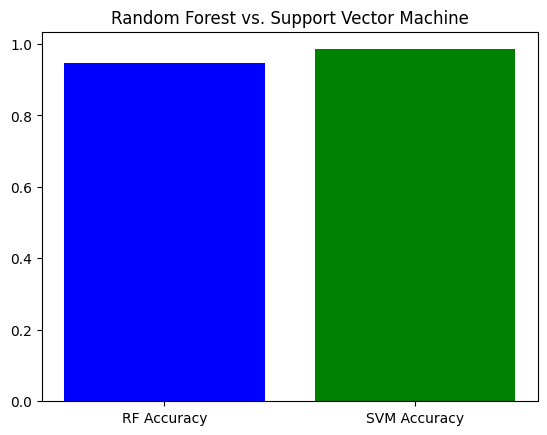

In [32]:
print('RF Accuracy:', accuracy)
print('SVM Accuracy:', svm_accuracy)
plt.bar(['RF Accuracy', 'SVM Accuracy'], [accuracy, svm_accuracy], color=['blue', 'green'])
plt.title('Random Forest vs. Support Vector Machine')
plt.show()

# Part 3 Data Poisoning Attack

This section will cover Data Poisoning attack on the given phisihing email data set. In this attack, there will be 2 different approaches of attacking:

1. Adding rows with flipped labels
2. Change the tokenization via changing keywords that would tamper tokenization with tfidvectorizer.

## Approach 1: Adding rows with flipped labels

** Check Train Datasets

In [ ]:
print("\n X_train Shape: ", X_train.shape)
print("\n y_train  Shape: ", y_train.shape)
print("\n Top 5 rows of X_train: ", X_train[:5])
print("\n Top 5 labels of y_train: ", y_train[:5])


 X_train Shape:  (14030,)

 y_train  Shape:  (14030,)

 Top 5 rows of X_train:  ["\nShopper Newsletter: AlertsJuly 18, 2002 \nFrom Computers4Sure.com iRiver's versatile SlimX just $149 \n From CDW Apple's groundbreaking iPod just $399Computers4Sure\n \n \niRiver SlimX iMP-350 \n\t\t\t\t\t\t\t\tâ€¢ Ultra-slim, 16.7mm in width\n\t\t\t\t\t\t\t\tâ€¢ Supports MP3/WMA/ASF/CD formats\n\t\t\t\t\t\t\t\tâ€¢ Rechargeable batteries included\n\t\t\t\t\t\t\t\tÂ\xa0Â\xa0Just $149\nSonicblue Rio Riot\n\t\t\t\t\t\t\t\tâ€¢ Stores over 400 complete albums \n\t\t\t\t\t\t\t\tâ€¢ Built-in FM tuner/custom presets\n\t\t\t\t\t\t\t\tâ€¢ Extra-large, backlit LCD \n\t\t\t\t\t\t\t\tÂ\xa0Â\xa0Just $300\nTDK Mojo CD-MP3\n\t\t\t\t\t\t\t\tâ€¢ Play up to 10 hours of music\n\t\t\t\t\t\t\t\tâ€¢ 8-minute MP3 skip protection\n\t\t\t\t\t\t\t\tâ€¢ Supports MP3, Audio CD\n\t\t\t\t\t\t\t    Â\xa0Â\xa0Just $125\nSonicblue Rio 600 (32MB)\n\t\t\t\t\t\t\t\tâ€¢ Customize your music!\n\t\t\t\t\t\t\t\tâ€¢ 32MB, supports MP3 and WMA\

**Create a Dictionary Set of Training Datapoints**

A dictionary is provided where malicious training data points are added in increments of 1500 up to doubling the training set with half of the labels being swapped.

In [ ]:
mal_dic = {}
# 'Safe Email', 'Phishing Email'
# adding 50% more rows ends up in >10 mins runtime
print('X_train size:', len(X_train))
max_poison = len(X_train)
for i in range(7000, max_poison, 7000):
    # copy 1st i rows from X_train
    ap1_mal_X = X_train[:i]
    # copy 1st i labels from y_train
    ap1_mal_y = y_train[:i]
    # change 'Safe Email' to 'Phishing Email' and vice versa for mal_y
    ap1_mal_y = np.where(ap1_mal_y == 'Safe Email', 'Phishing Email', 'Safe Email')
    # add mal_X to X_train and mal_y to y_train (copied for reference)
    X_poisoned_train = np.concatenate([X_train, ap1_mal_X])
    y_poisoned_train = np.concatenate((y_train, ap1_mal_y))
    num_rows = 0
    if i > len(y_train):
        num_rows = len(y_train)
    else:
        num_rows = i
    mal_dic[num_rows] = {
        "X_train": X_poisoned_train,
        "y_train": y_poisoned_train
    }
    print('Current increment:', num_rows, '|', "X_train Shape: ", X_poisoned_train.shape, '|', "y_train  Shape: ", y_poisoned_train.shape)

X_train size: 14030
Current increment: 7000 | X_train Shape:  (21030,) | y_train  Shape:  (21030,)
Current increment: 14000 | X_train Shape:  (28030,) | y_train  Shape:  (28030,)


**Train Random Forest with Poisoned Trained Datset**

In [ ]:
rf_poison_dic = {}
rf_poison_cm_dic = {}
for key in mal_dic.keys():
  poison_classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])
  poison_classifier.fit(mal_dic[key]["X_train"], mal_dic[key]["y_train"])
  y_poison_pred_rf = poison_classifier.predict(X_test)

  rf_poison_cm_dic[key] = confusion_matrix(y_test,y_poison_pred_rf)
  rf_poison_dic[key] = accuracy_score(y_test,y_poison_pred_rf)
  print('Current Iteration:', key, 'added rows.')
  print("Accuracy: %.2f%%" % (rf_poison_dic[key] * 100.0))
  # 57 minutes to complete for 50% added rows and 100% added rows entries

Current Iteration: 7000 added rows.
Accuracy: 85.18%
Current Iteration: 14000 added rows.
Accuracy: 50.54%


**Analysis of Accuracies**

Accuracy Comparison - Total Time Ran for Approach 1 Data Poison: 57 minutes


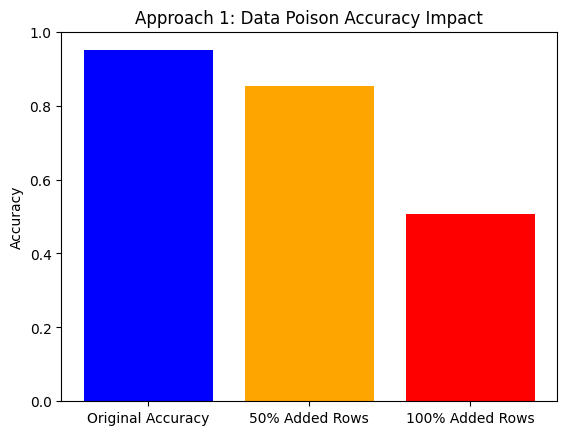

In [ ]:
print('Accuracy Comparison - Total Time Ran for Approach 1 Data Poison: 57 minutes')
plt.bar(['Original Accuracy', '50% Added Rows', '100% Added Rows'], [accuracy, rf_poison_dic[7000], rf_poison_dic[14000]], color=['blue', 'orange', 'red'])
plt.ylim(0, 1.0)
plt.title('Approach 1: Data Poison Accuracy Impact')
plt.ylabel('Accuracy')
plt.show()

**Confusion Matrix of 50% Added Rows**

Random Forest Accuracy: 0.8517673888255416


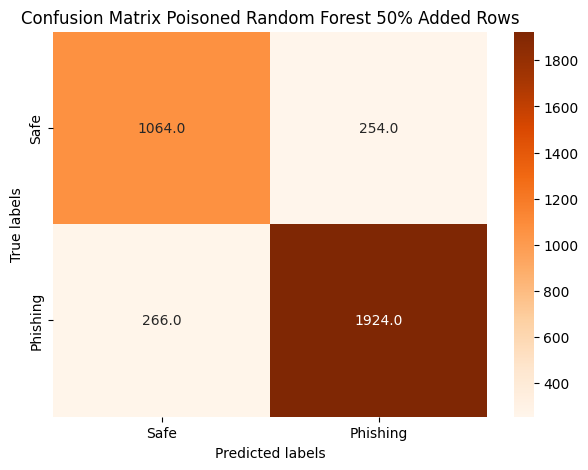

In [ ]:
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(rf_poison_cm_dic[7000],cmap="Oranges",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Poisoned Random Forest 50% Added Rows');
print('Random Forest Accuracy:', rf_poison_dic[7000])

**Confusion Matrix of 100% Added Rows (Lowest Accuracy)**

Random Forest Accuracy: 0.5054161915621437


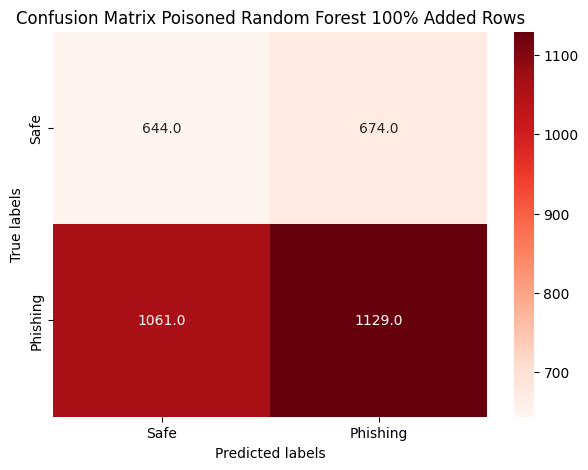

In [ ]:
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(rf_poison_cm_dic[14000],cmap="Reds",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Poisoned Random Forest 100% Added Rows');
print('Random Forest Accuracy:', rf_poison_dic[14000])

**Training SVM Model with Poisoned Dataset**

In [ ]:
svm_poison_dic = {}
svm_poison_cm_dic = {}
for key in mal_dic.keys():
  poison_classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",SVC(kernel='rbf', random_state=0))])
  poison_classifier.fit(mal_dic[key]["X_train"], mal_dic[key]["y_train"])
  y_poison_pred_rf = poison_classifier.predict(X_test)

  svm_poison_cm_dic[key] = confusion_matrix(y_test,y_poison_pred_rf)
  svm_poison_dic[key] = accuracy_score(y_test,y_poison_pred_rf)
  print('Current Iteration:', key, 'added rows.')
  print("Accuracy: %.2f%%" % (rf_poison_dic[key] * 100.0))
  # 57 minutes to complete for 50% added rows and 100% added rows entries

**

**SVM Accuracy Comparison**

In [ ]:
print('SVM Accuracy Comparison - Total Time Ran for Approach 1 Data Poison: 57 minutes')
plt.bar(['Original Accuracy', '50% Added Rows', '100% Added Rows'], [accuracy, rf_poison_dic[7000], rf_poison_dic[14000]], color=['green', 'orange', 'red'])
plt.ylim(0, 1.0)
plt.title('Approach 1: Data Poison Accuracy Impact')
plt.ylabel('Accuracy')
plt.show()

**SVM - Confusion Matrix of 50% Added Rows**

In [ ]:
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(svm_poison_cm_dic[7000],cmap="Oranges",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('SVM Confusion Matrix Poisoned Random Forest 50% Added Rows');
print('SVM Accuracy:', svm_poison_dic[7000])

**SVM - Confusion Matrix of 50% Added Rows**

In [ ]:
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(svm_poison_cm_dic[14000],cmap="Reds",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('SVM Confusion Matrix Poisoned Random Forest 100% Added Rows');
print('SVM Accuracy:', svm_poison_dic[14000])

**Double Bar Graph Comparison of RF and SVM**

## Approach 2: Changing Keywords

**Get the most common key words**

In [ ]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

email_text = df['Email Text'].copy()
token_list = []
for text in email_text:
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  token_list.extend(tokens)
  # email_text[text] = text

counter = Counter(token_list)
most_common_words = counter.most_common(10)
print(most_common_words)
# estimated in 4 minutes

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[('enron', 17841), ('university', 17233), ('email', 16900), ('language', 16892), ('one', 14631), ('information', 14359), ('please', 13388), ('new', 12991), ('would', 12403), ('subject', 11993)]


**More Data Analysis on Text Set**

In [ ]:
# most_common_words = counter.most_common(1)
#print(most_common_words[0][0])
#common_word = most_common_words[0][0]
COEF = 0.33
most_common_words = counter.most_common(10)
common_word_ref = {}
for common_word in most_common_words:
  phishing_count = 0
  safe_count = 0
  for index, row in df.iterrows():
    if common_word[0] in row['Email Text']:
      if row['Email Type'] == 'Safe Email':
        # df.at[index, 'Email Type'] = 'Phishing Email'
        safe_count += 1
      else:
        # df.at[index, 'Email Type'] = 'Safe Email'
        phishing_count += 1

  if phishing_count < safe_count and phishing_count / safe_count < COEF:
    # df.at[index, 'Email Type'] = 'Safe Email'
    common_word_ref[common_word[0]] = {
        'phishing_count': phishing_count,
        'safe_count': safe_count
    }
    print(f'Common Word: {common_word[0]}, Count: {common_word[1]}')
    print(f'Phishing Count: {phishing_count}')
    print(f'Safe Count: {safe_count}\n')

#word_list = dict(zip(most_common_words[0], most_common_words[1]))

Common Word: enron, Count: 17841
Phishing Count: 1
Safe Count: 2264

Common Word: university, Count: 17233
Phishing Count: 43
Safe Count: 1492

Common Word: language, Count: 16892
Phishing Count: 92
Safe Count: 1622

Common Word: subject, Count: 11993
Phishing Count: 823
Safe Count: 2549



**Poisoning Dataset**

In [ ]:
mal_X = email_text.values
print(type(mal_X[0]))
print(mal_X.shape)
print(list(common_word_ref.keys()))
count = 0
for text in mal_X:
  for common_word in list(common_word_ref.keys()):
    if common_word in text:
      mal_X[count] = text.replace(common_word, 'spam')
  count += 1

print(mal_X.shape)
print(y_train.shape)


<class 'str'>
(17538,)
['enron', 'university', 'language', 'subject']
(17538,)
(14030,)


**Training Poison Model**

In [ ]:
ap2_X_train, ap2_X_test, ap2_y_train, ap2_y_test = train_test_split(mal_X, Y, test_size=0.2, random_state = 101)
print("\n X_train Shape: ", ap2_X_train.shape)
print("\n X_test Shape: ", ap2_X_test.shape)
print("\n y_train  Shape: ", ap2_y_train.shape)
print("\n y_test Shape: ", ap2_y_test.shape)

poison_classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])
poison_classifier.fit(ap2_X_train,y_train)


 X_train Shape:  (14030,)

 X_test Shape:  (3508,)

 y_train  Shape:  (14030,)

 y_test Shape:  (3508,)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

**Prediction and Accuracy Score of Approach 2's Data Poisoned Model**

Accuracy: 94.44%
[[1232   86]
 [ 109 2081]]
                precision    recall  f1-score   support

Phishing Email       0.92      0.93      0.93      1318
    Safe Email       0.96      0.95      0.96      2190

      accuracy                           0.94      3508
     macro avg       0.94      0.94      0.94      3508
  weighted avg       0.94      0.94      0.94      3508



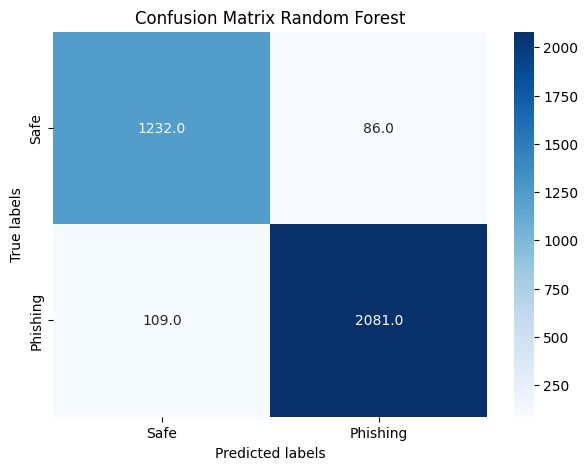

In [35]:
ap2_y_pred = poison_classifier.predict(ap2_X_test)

#accuracy_score
ap2_accuracy = accuracy_score(ap2_y_test,ap2_y_pred)
print("Accuracy: %.2f%%" % (ap2_accuracy * 100.0))
#confusion_matrix
ap2_cm = confusion_matrix(ap2_y_test,ap2_y_pred)
print(ap2_cm)

#classification_report
ap2_cr = classification_report(ap2_y_test,ap2_y_pred)
print(ap2_cr)

labels = ['Safe', 'Phishing']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(ap2_cm,cmap="Blues",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Random Forest');

**Train Poison Model - SVM**

In [33]:
poison_classifier_svm = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",SVC(kernel='rbf', random_state=0))])
poison_classifier_svm.fit(ap2_X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(random_state=0))])

**Poison SVM Model Analysis**

Accuracy: 98.52%
[[1291   27]
 [  25 2165]]
                precision    recall  f1-score   support

Phishing Email       0.98      0.98      0.98      1318
    Safe Email       0.99      0.99      0.99      2190

      accuracy                           0.99      3508
     macro avg       0.98      0.98      0.98      3508
  weighted avg       0.99      0.99      0.99      3508



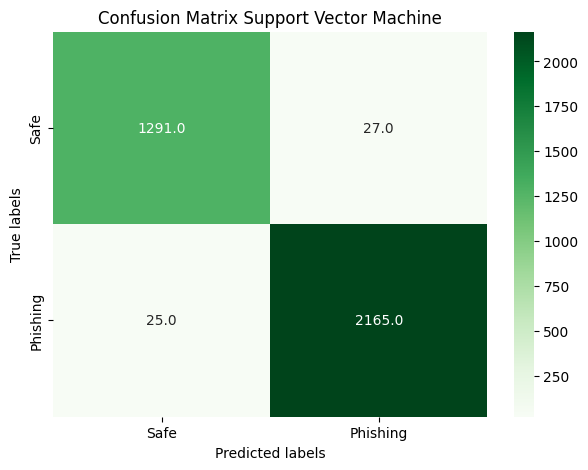

In [37]:
ap2_y_pred_svm = poison_classifier_svm.predict(ap2_X_test)

#accuracy_score
ap2_accuracy_svm = accuracy_score(ap2_y_test,ap2_y_pred_svm)
print("Accuracy: %.2f%%" % (ap2_accuracy_svm * 100.0))
#confusion_matrix
ap2_cm_svm = confusion_matrix(ap2_y_test,ap2_y_pred_svm)
print(ap2_cm_svm)

#classification_report
ap2_cr_svm = classification_report(ap2_y_test,ap2_y_pred_svm)
print(ap2_cr_svm)

labels = ['Safe', 'Phishing']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(ap2_cm_svm,cmap="Greens",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Support Vector Machine');

**Testing Email Samples to see if Poisoned Model Works**

In [42]:
ham_test = 'Hi Kurt! How was your day? This is Prof Charles. I would like to arrange a work meeting with you soon. Please let me know your availabilityes.'
spam_test = 'Would you like a free Amazon Gift Card? Follow the link provided!! <link>'
spam_test_2 = 'Thanks for your subscription to Hulu and you will be charged $9.99/month.'
ham_test_2 = 'omw to work now'

test_list = [ham_test, ham_test_2, spam_test, spam_test_2]
test_expected = ['Safe Email', 'Safe Email', 'Phishing Email', 'Phishing Email']

# RF test
test_pred = poison_classifier.predict(test_list)
print('RF Results', test_pred)
test_accuracy = accuracy_score(test_expected,test_pred)
print("RF Accuracy: %.2f%%" % (test_accuracy * 100.0))

# SVM test
test_pred_svm = poison_classifier_svm.predict(test_list)
print('SVM Results', test_pred_svm)
test_accuracy_svm = accuracy_score(test_expected,test_pred_svm)
print("SVM Accuracy: %.2f%%" % (test_accuracy_svm * 100.0))

RF Results ['Phishing Email' 'Phishing Email' 'Phishing Email' 'Safe Email']
RF Accuracy: 25.00%
SVM Results ['Phishing Email' 'Phishing Email' 'Phishing Email' 'Safe Email']
SVM Accuracy: 25.00%
